**(NY) Stock closing price predictions using Deep Learning , Tensorflow & Keras**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset

In [8]:
df=pd.read_csv('prices-split-adjusted.csv', header = 0)

In [9]:
df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.shape

(851264, 7)

### Filter YAHOO data

In [10]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [11]:
df_yahoo=df[df['symbol']=='YHOO']

In [12]:
df_yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [13]:
df_yahoo.shape

(1762, 7)

### Explore YAHOO data

In [14]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [15]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [16]:
df_yahoo['date']= pd.to_datetime(df_yahoo['date'])  # convert date to datetime type

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
print(str(df_yahoo.date.dtype))

datetime64[ns]


In [18]:
df_yahoo.set_index('date',inplace=True)  # set date as index

In [19]:
str(df_yahoo.index.dtype)=='datetime64[ns]'

True

In [20]:
print(df_yahoo.index.name)

date


In [18]:
print(df_yahoo.shape)

(1762, 6)


In [21]:
yahoo_data=df_yahoo.asfreq(freq='b')  #

In [22]:
print(yahoo_data.shape)  # The above step will add some 

(1825, 6)


### Clean data and fill missing values

In [23]:
yahoo_data.tail(30)

,symbol,open,close,low,high,volume
date,,,,,,
2016-11-21,YHOO,41.439999,41.110001,40.939999,41.480000,11338000.0
2016-11-22,YHOO,41.200001,41.009998,40.830002,41.400002,8881200.0
2016-11-23,YHOO,40.910000,40.959999,40.549999,40.980000,3634900.0
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,YHOO,41.080002,40.869999,40.709999,41.080002,2586900.0
2016-11-28,YHOO,40.849998,41.450001,40.740002,41.700001,6765800.0
2016-11-29,YHOO,41.430000,41.599998,41.119999,41.830002,7246100.0
2016-11-30,YHOO,41.619999,41.020000,40.880001,41.669998,7624500.0
2016-12-01,YHOO,41.000000,39.630001,39.529999,41.040001,12614600.0


In [24]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [25]:
null_data=yahoo_data[yahoo_data.isnull().any(axis=1)] # find null values and store in null_data 

In [26]:
null_data.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
null_data.shape

(63, 6)

In [28]:
type(null_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [29]:
null_dates=null_data.index.tolist() #convert null_dates to list

In [30]:
type(null_dates)

list

In [31]:
null_data.shape==(63, 6)

True

In [32]:
# Manually check if any of the null dates matches with NYC holidays, If yes then put that date in holidays list. Remove holidays 
# from null_data list to get non-holidays list.

import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]


non_holidays = [x for x in null_dates if x not in holidays] 
print(non_holidays) # Data is missing only for 2 dates.

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [33]:
print(yahoo_data.shape)

(1825, 6)


In [34]:
modified_df=yahoo_data.drop(holidays) # Remove holidays from dataframe

In [35]:
modified_df.shape

(1764, 6)

In [36]:
modified_df.isnull().sum()

symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

In [37]:
modified_df.isna().sum() #  check number of null values after removing holidays 

symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

In [38]:
modified_df.fillna(method='bfill',axis='rows',inplace=True) #fill missing/null values 

In [39]:
modified_df.isnull().sum() # after fillna() null values are filled using 'bfill' method

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Visualize YAHOO data

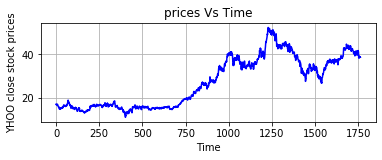

In [40]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

### Split data into train , validation and test set

In [41]:
n_train=int(len(closing_stock)* 0.80)
n_remaining=len(closing_stock) - n_train
n_val=int(n_remaining*0.50)
n_test=int(n_remaining-n_val)

In [42]:
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test )


Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [43]:
train_data=closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


In [44]:
val_data=closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(176, 1)


In [45]:
test_data=closing_stock[n_train+n_val:]
print(test_data.shape)

(177, 1)


### Feature scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler(feature_range=(0, 1))

In [48]:
train=scaler.fit_transform(train_data)
val=scaler.transform(val_data)
test=scaler.transform(test_data)

### Create datasets required by GRU algorithm

In [49]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
n_features=2

In [51]:
trainX,trainY=create_dataset(train,n_features)

In [52]:
valX,valY=create_dataset(val,n_features)

In [53]:
testX,testY=create_dataset(test,n_features)

In [54]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [55]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [56]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


### Build the model using GRU algorithm

In [57]:
import tensorflow as tf

In [65]:
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


In [66]:
model=keras.Sequential()

In [67]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [70]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_squared_error'])

In [69]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 1, 100)            31200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
gru_7 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_8 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [71]:
history=model.fit(trainX,trainY,epochs=100,batch_size=128,verbose=1,validation_data=(valX,valY))

Train on 1408 samples, validate on 173 samples
Epoch 1/100
1408/1408 [==============================] - 5s 4ms/sample - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/100
1408/1408 [==============================] - 0s 89us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 3/100
1408/1408 [==============================] - 0s 90us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 6.7740e-04 - val_mean_squared_error: 6.7740e-04
Epoch 4/100
1408/1408 [==============================] - 0s 87us/sample - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/100
1408/1408 [==============================] - 0s 93us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 6.5164e-04 - val_mean_squared_error: 6.5164e-04
Epoch 6/100
1408/1408 [==============================] - 0s 87us/sample - loss: 0.0024 - mean_squa

### Evaluate the model

In [72]:
import math

In [73]:
def model_score(model,X_train,Y_train,X_val,Y_val,X_test,Y_test):
    print("Train Score:")
    train_score=model.evaluate(X_train,Y_train,verbose=0)
    print("MSE={:.5f} , RMSE={:.2f}".format(train_score[0],math.sqrt(train_score[0])))
    print("Validation Score:")
    val_score=model.evaluate(X_val,Y_val,verbose=0)
    print("MSE={:.5f} , RMSE={:.2f}".format(val_score[0],math.sqrt(val_score[0])))
    print("Test Score:")
    test_score=model.evaluate(X_test,Y_test,verbose=0)
    print("MSE={:.5f} , RMSE={:.2f}".format(test_score[0],math.sqrt(test_score[0])))

In [74]:
model_score(model, trainX, trainY ,valX, valY , testX, testY)


Train Score:
MSE=0.00018 , RMSE=0.01
Validation Score:
MSE=0.00038 , RMSE=0.02
Test Score:
MSE=0.00024 , RMSE=0.02


In [75]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [76]:
model.history.history

{'loss': [0.09228153255852786,
  0.027990306896919556,
  0.01093912075951018,
  0.003720478313467042,
  0.00306871268813583,
  0.002418794827959077,
  0.002252448212609372,
  0.002352136801081625,
  0.0019125742414458232,
  0.0017621238313784654,
  0.0019492471738803115,
  0.0017852729440412738,
  0.002036661280065098,
  0.001881796760823239,
  0.0017127492570910942,
  0.001555404816330834,
  0.001659053324891085,
  0.0016969953748312864,
  0.0015549553896893155,
  0.0016933393939821558,
  0.0014833018014376814,
  0.0014785323027436707,
  0.001380659248256548,
  0.0013861376845108514,
  0.0014376480195840652,
  0.0016098859381269324,
  0.001692576958289878,
  0.0014310661195354028,
  0.0014531135305084965,
  0.0013392600389620798,
  0.0012676784324205735,
  0.0013725150122561238,
  0.001444504924372516,
  0.0013674361927604134,
  0.0013389023052613165,
  0.0013988310979171233,
  0.0013405568156899376,
  0.0010958886017430234,
  0.0012833962523886426,
  0.001384858401830901,
  0.0012524

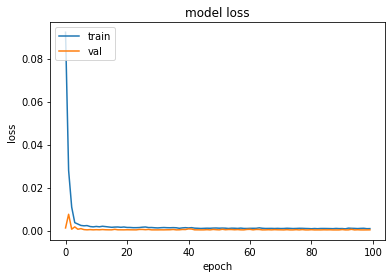

In [77]:
# Plotting losses
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
pred=model.predict(testX) # make predictions using model

In [79]:
pred=scaler.inverse_transform(pred) 


In [80]:
testY_actual=scaler.inverse_transform(testY.reshape(testY.shape[0],1))

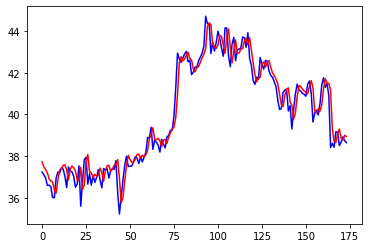

In [81]:
plt.plot(testY_actual , 'b') #plot predicted data and actual values(testY)
plt.plot(pred,'r')

In [85]:
d=pd.DataFrame([p,a] for p,a in zip(pred,testY_actual))# Create list of predicted and actual values to compare side by side

In [86]:
d.columns=['Predicted','Actual']
d

,Predicted,Actual
0,[37.72151],[37.23]
1,[37.494892],[37.11]
2,[37.33873],[36.95]
3,[37.19399],[36.59]
4,[36.900898],[36.6]
...,...,...
169,[39.295822],[38.5]
170,[38.85286],[38.66]
171,[38.768917],[38.92]
172,[38.992393],[38.73]


**We can see from above list and plot that model is making good predictions and loss is also very low.**